<a href="https://colab.research.google.com/github/javed075/SPARK-FOUNDATION-TASK2/blob/main/TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**GRIP: The Sparks Foundation**
#Data Science and Business Analyst intern
#Author: JAVED AHMAD
#Task 1: Prediction using Supervised ML

#**Predict the percentage of an student based on the no. of study hours.**

In [ ]:
# import important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
# Reading data from remote link
url ="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)



In [ ]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


###Plotting the distribution of scores

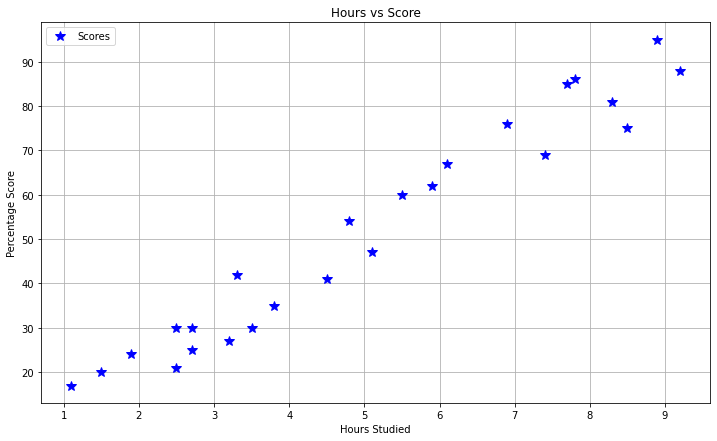

In [ ]:
# Plotting the distribution of scores
plt.rcParams["figure.figsize"]=[12,7]
df.plot(x='Hours', y='Scores', style='*',color="blue",markersize=10)  
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

#**Preparing the data**

In [ ]:
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values  

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 

#**Training the Algorithm**

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training complete.")

Training complete.


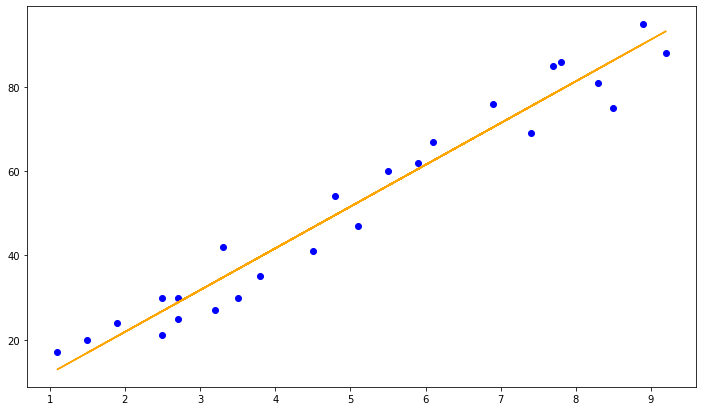

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.rcParams["figure.figsize"]=[12,7]
plt.scatter(X, Y,color="blue")
plt.plot(X, line,markersize=10,color="orange");
plt.show()

#**Making Predictions**


In [ ]:
print(X_test) # Testing data - In Hours
Y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#**What will be predicted score if a student studies for 9.25 hrs/ day?**

In [ ]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


#**Hence, The predicted score if a student studies for 9.25 hrs/ day is 93.69**
##Evaluating the model

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.183859899002982
